# Generation of time traces and notion of quasi-static time

In our model, a qubit evolves via a discretized time-dependent Hamiltonian $h(t) = \epsilon(t) Z$,
with $t=t_s,\dots,N t_s$, where $t_s$ is the sampling time and acts as our unit of time in our code suite (i.e., $t_s=1$ in what follows.), and $N$ is the length of the time trace.

We have three types of noise: quasi-static, white, and pink noise implemented that are defined in `spin_pulse.environment.noise`.

For a qubit initialized in $\ket{0}+\ket{1}$, the observable $X$ will decay in time due to the noise Hamiltonian $h(t)$.

Repeating this experiment multiple times, we will obtain a Ramsey signal

$$\braket{X(t)}=\frac{1}{2}(1+C)$$

with the Ramsey contrast $C=\mathbb{E}[e^{-i\sum_{t'\le t}\epsilon(t')}]$, and $\mathbb{E}$ denotes an ensemble average over multiple random realizations of the time trace.



## Quasi-static noise

In the case of quasi-static noise, we have a time-independent signal $\epsilon(t)=\epsilon$ where $\epsilon$ is chosen from a random normal distribution of standard deviation $\sigma$.

This leads to

$$
C=\mathbb{E}[\exp(-it \epsilon)]=\exp(-t^2\sigma^2/2)=\exp(-(t/T_2^*)^2)
$$

with $T_2^*=\sqrt{2}/\sigma$.

Note: the first equality corresponds to the expression of the characteristic function of the normal distribution.

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib as mpl
import matplotlib.pyplot as plt

from spin_pulse.environment.noise import (
    PinkNoiseTimeTrace,
    QuasistaticNoiseTimeTrace,
    WhiteNoiseTimeTrace,
)

mpl.rcParams["font.size"] = 20

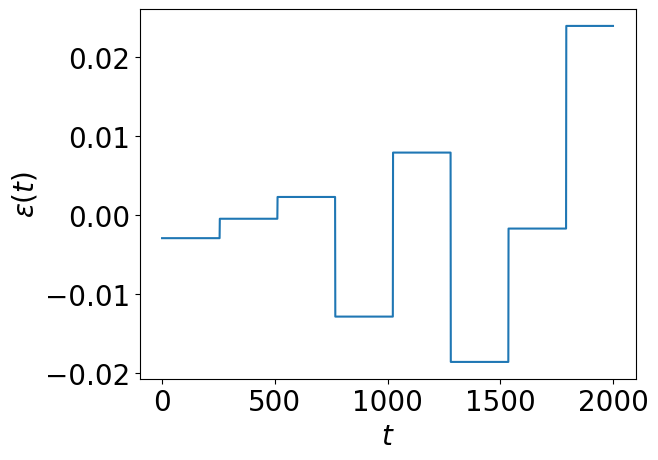

In [2]:
duration = 2**18
segment_duration = 2**8
T2S = 100
time_trace = QuasistaticNoiseTimeTrace(T2S, duration, segment_duration)
time_trace.plot(n_max=2000)
# plt.savefig('../paper/fig3a.pdf',bbox_inches="tight")

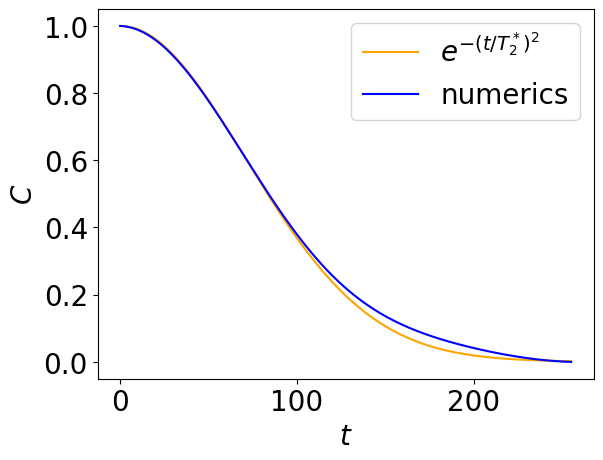

In [3]:
ramsey_duration = segment_duration
time_trace.plot_ramsey_contrast(ramsey_duration)
# plt.savefig("fig3d.pdf", bbox_inches="tight")

## White noise

In the case of white noise, we have a time-dependent signal where $\epsilon(t)$ where $\epsilon(t)$ is chosen from a random normal distribution of standard deviation $\sigma$.

$$C=\mathbb{E}[\exp(-i\epsilon(1))]^t=\exp(-t\sigma^2/2)=\exp(-t/T_2^*)$$

with $T_2^*=2/\sigma^2$. Remember that the code is expressed in the unit of discretization time $t_s$, so we have $T_2^*=2t_s/\sigma^2$ in SI units.

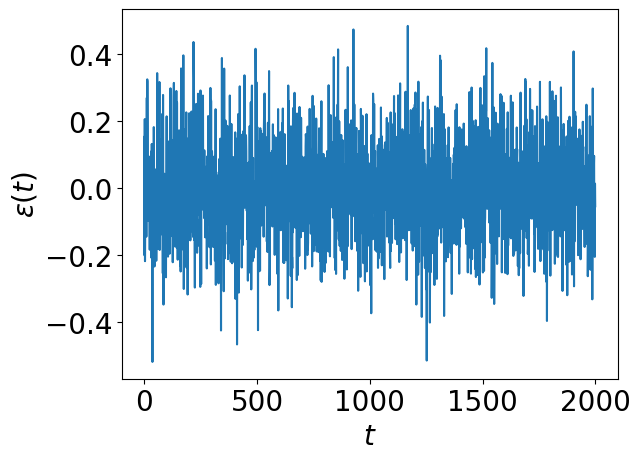

In [4]:
time_trace = WhiteNoiseTimeTrace(T2S, duration, 1)
time_trace.plot(n_max=2000)
# plt.savefig("../paper/fig3b.pdf", bbox_inches="tight")

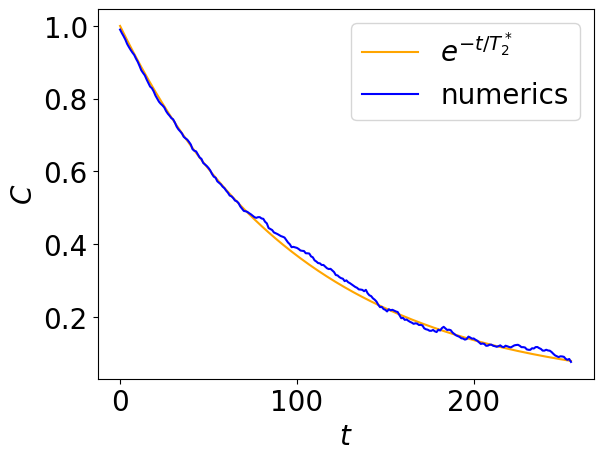

In [5]:
time_trace.plot_ramsey_contrast(ramsey_duration)
# plt.savefig("fig3e.pdf", bbox_inches="tight")

## Pink noise

With pinknoise, we consider time traces of the form $\omega(t)=2\pi \sqrt{S_0} g(t)$, where $g(t)$ is a normalized time trace associated with a Power-Spectral Density $S_g(f)=1/f$, where $f$ is the discretized frequency associated with the time vector $t$ introduced above, and $S_0$ is the spectral intensity (which has dimension of the square frequency, and is thus written in our code in units of $t_s^{-2}$)

Following [Yoneda, et al, 2018](https://doi.org/10.1038/s41565-017-0014-x.), and refs therein, the Ramsey contrast can be approximated as follows

$$
C\approx \exp(-t^2/(T_2^*)^2)
$$

with a *time-dependent* value of the coherence time

$$T_2^*(t) = \frac{1}{2\pi\sqrt{S_0\log(\frac{1}{f_{\min}t})}}.$$

In the short-time limit, we can assume $T_2^*(t)=T_2^*(1)=T_2^*$. This  gives us a possibility to choose the value of

$$S_0=1/(4\pi^2\log(1/f_{\min})[T_2^*]^2),$$

for a certain time trace duration $N$ to achieve a certain value of $T_2^*$


In ``SpinPulse``, the value of $f_{\min}$ is set as the inverse of the argument ``segment_duration``. Increasing ``segment_durations`` incorporates more low-frequency components in the signal.

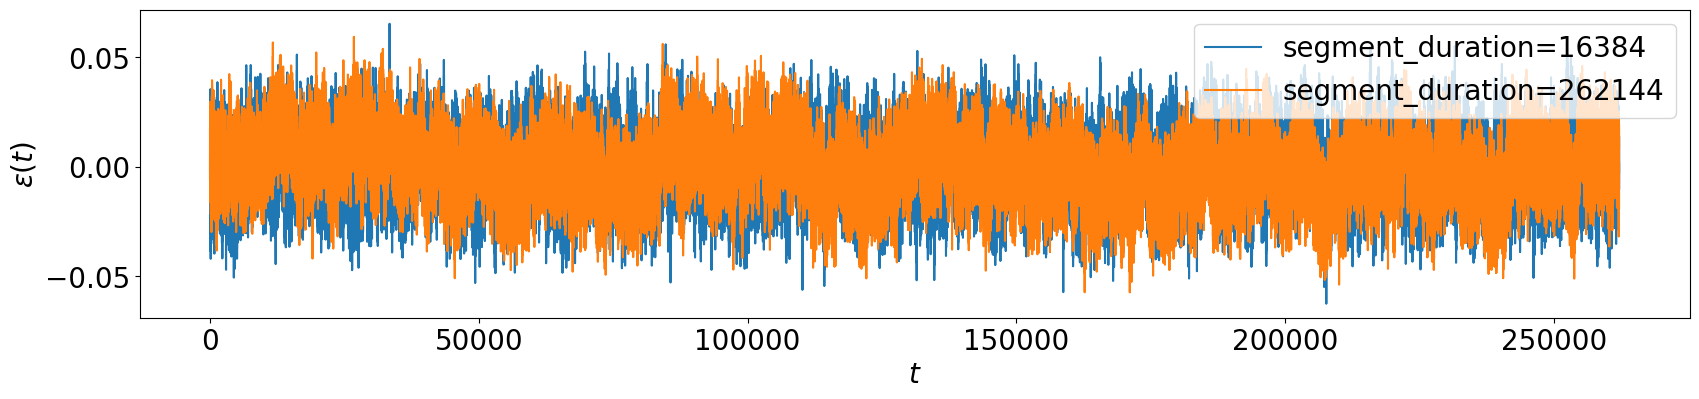

In [6]:
segment_duration_1 = 2**14
segment_duration_2 = duration
time_trace_1 = PinkNoiseTimeTrace(T2S, duration, segment_duration_1)
time_trace_2 = PinkNoiseTimeTrace(T2S, duration, segment_duration_2)

plt.figure(figsize=(20, 4))
plt.plot(time_trace_1.values)
plt.plot(time_trace_2.values)
plt.xlabel("$t$")
plt.ylabel(r"$\epsilon(t)$")
plt.legend(
    [f"segment_duration={s}" for s in [segment_duration_1, segment_duration_2]], loc=0
)

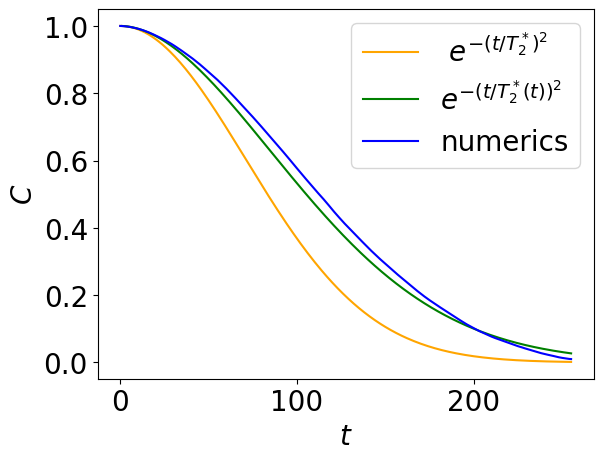

In [7]:
time_trace_2.plot_ramsey_contrast(ramsey_duration)
# plt.savefig("fig3f.pdf", bbox_inches="tight")